one variable, but present in formula with increased no of powers
1. y=b0+b1(x)+b2(x^2).....bn(x^n)

importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

importing the dataset, here we have just one variable but we have to make structural changes in the matrix of independent variable

In [2]:
data=pd.read_csv('./datasets/Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


splitting into dependent and independent variables

In [3]:
x=data.iloc[:,1:-1].values   #removed the first column as label encoding is already there
y=data.iloc[:,-1]

We are not splitting into test and train we just want to see difference btw simple and polynomial

Let's first do simple regression as one value is present

In [4]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [5]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=4)   #4 tak ki power chahiye
x_poly=pf.fit_transform(x)   #matrics of x,x^2,x^3 and x^4

In [6]:
lr2=LinearRegression()
lr2.fit(x_poly,y)   #abhi naya matrix hai hamare pass power wala

LinearRegression()

Let's visualise both

Linear Regression

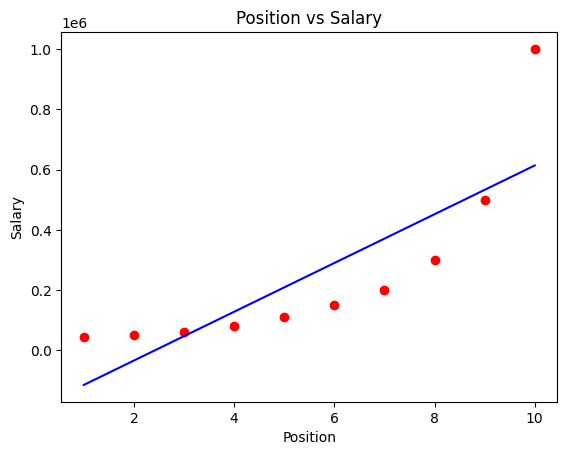

In [7]:
plt.scatter(x,y,color='red')   #original
plt.plot(x,lr.predict(x),color='blue')   #regression line
plt.title('Position vs Salary')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

Not much efficient

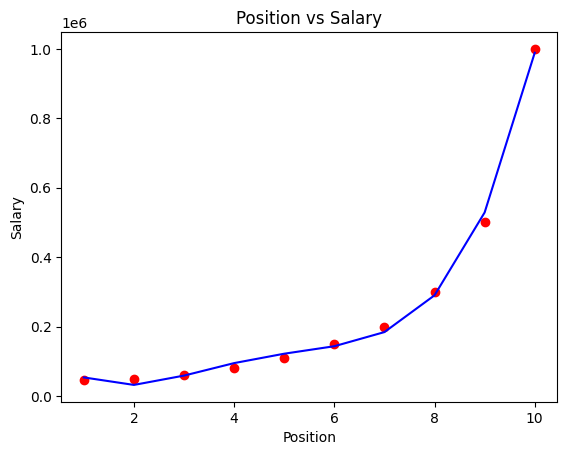

In [8]:
plt.scatter(x,y,color='red')    #original
plt.plot(x,lr2.predict(x_poly),color='blue')   #regression line
plt.title('Position vs Salary')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

Very much accurate

Let's predict

In [9]:
pos=float(input("Enter ur position in the form of numerical"))
sal1=lr.predict([[pos]])
print(f"Your salary predicted in new company is {sal1}")
#now create that matrix for pos
sal2=lr2.predict(pf.fit_transform([[pos]]))    #pos 2D matrix mai hona chahiye as polynomial features 2d mai leta hai
print(f"Your expected salary is {sal2}")

Your salary predicted in new company is [532575.75757576]
Your expected salary is [528694.63869465]


the input is 9 khud check krlo kitna galat bata rha hai linear regression